# Notebook to test models

In [11]:
from rivapy.models.gbm import GBM
from rivapy.models.heston_for_DH import HestonForDeepHedging
#from rivapy.models.roughbergomi_for_DH import rBergomiForDeepHedging
#from rivapy.models.SDE_for_DH import SDEForDeepHedging
from rivapy.models.heston_with_jumps import HestonWithJumps
from rivapy.models.barndorff_nielsen_shephard import BNS

#import sys
#sys.path.insert(0,'../..')
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[0.         0.         0.         ... 3.01117111 3.01372229 3.01626174]


Text(0.5, 1.0, 'Models')

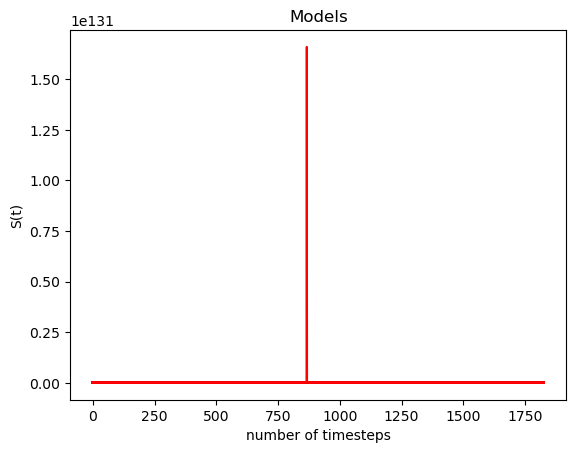

In [21]:
# as in https://perswww.kuleuven.be/~u0009713/ScSiTi03.pdf:
# Heston, NIG_CIR, VG_CIR, NIG_GammaOU, VG_GammaOU

np.random.seed(123)
n = 5*365
T = n/365
timegrid = np.linspace(0.0,T,n) # simulate on daily timegrid over 30 days
n_sims = 100
S0 = 1.#24.6144
v0 = 0.0654


model = HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.2028, correlation_rho = -0.757)
paths_Heston = model.simulate(timegrid, S0=S0, v0=v0, M=n_sims,n=n,model_name='Heston')

v0 = 0.0576
model = HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.065,
                  vol_of_vol = 0.2286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382)
paths_HestonWithJumps = model.simulate(timegrid, S0=S0, v0=v0, M=n_sims,n=n,model_name='Heston')

v0 = 0.0433
model = BNS(rho =-4.675,lmbda=0.5474,b=18.6075,a=0.6069)
paths_BNS = model.simulate(timegrid, S0=S0, v0=v0, M=n_sims,n=n,model_name='BNS')



plt.figure()
plt.plot(paths_Heston[:,:], color = 'blue')
plt.plot(paths_HestonWithJumps[:,:], color = 'cyan')
plt.plot(paths_BNS[:,:],color='grey')

plt.xlabel('number of timesteps')
plt.ylabel('S(t)')
plt.title('Models')